# Temporal overlap figure

In [1]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

## Fake data

In [2]:
#fake uavsar dates
columns = ['start_date', 'end_date', 'collection']
index = range(8)

uavsar_df = pd.DataFrame(columns=columns, index=index)

uavsar_df['start_date'] = ['20200910', '20201010', '20201110', '20201210', '20210110', '20211020', '20210910', '20211010']
uavsar_df['end_date'] = ['20201010', '20201110', '20201210', '20210110', '20211020', '20210910', '20211010', '20211110']
uavsar_df['collection'] = ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
uavsar_df['date_order'] = range(8)

uavsar_df['start_date'] = pd.to_datetime(uavsar_df['start_date'], format='%Y%m%d')
uavsar_df['end_date'] = pd.to_datetime(uavsar_df['end_date'], format='%Y%m%d')

In [3]:
# fake icesat 2 passes 
columns = ['date']
index = range(8)

icesat_df = pd.DataFrame(columns=columns, index=index)

icesat_df['date'] = ['20200923', '20201016', '20201102', '20201216', '20210130', '20211020', '20210908', '20211019']
icesat_df['collection'] = ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
icesat_df['date'] = pd.to_datetime(icesat_df['date'], format='%Y%m%d')

Text(0.5, 0, 'date')

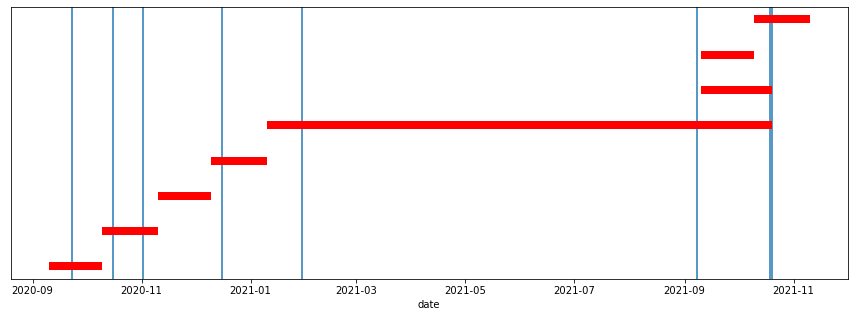

In [4]:
#sns.set_theme()

# plot temporal overlap
f, ax = plt.subplots(figsize=(15,5))

for i in range(len(icesat_df)):
    ax.axvline(icesat_df['date'][i], 0, 1)

for i in range(len(uavsar_df)):
    ax.plot([uavsar_df['start_date'][i], uavsar_df['end_date'][i]], [i, i], 'r', lw=8, solid_capstyle='butt')
ax.set_yticks([])
ax.set_xlabel('date')

## Grand Mesa

In [5]:
# Copying dates from https://uavsar.jpl.nasa.gov/cgi-bin/data.pl, asf search api is down
#uavsar dates from flight line: grmesa07805
grmesa07805_start = ['20170222', '20170222', '20170222', '20170225', '20170206', '20170206', '20170206', '20170206', '20170206']
grmesa07805_end = ['20170225', '20170308', '20170331', '20170301', '20170222', '20170222', '20170225', '20170308', '20170331']

#uavsar dates from flight line grmesa08006:
grmesa08006_start = ['20170222', '20170222', '20170206', '20170206', '20170206']
grmesa08006_end = ['20170308', '20170331', '20170222', '20170308', '20170331']

#uavsar dates from flight line grmesa08112:
grmesa08112_start = ['20161027', '20150609', '20150512', '20150504', '20150408']
grmesa08112_end = ['20170905', '20160623', '20150629', '20150512', '20150504']

#uavsar dates from flight line grmesa26006: 
grmesa08112_start = ['20170225', '20170225', '20170225', '20170222', '20170222', '20170222', '20170222', '20170206', '20170206', '20170206', '20170206', '20170206']
grmesa08112_end = ['20170308', '20170331', '20170331', '20170225', '20170225', '20170308', '20170331', '20170222', '20170222', '20170225', '20170308', '20170331']

#uavsar dates from flight line grmesa26108:
grmesa26108_start = ['20161027', '20150512', '20150504', '20150428']
grmesa26108_end = ['20170905', '20150629', '20150512', '20150504']

#uavsar dates from flight line grmesa27416:
grmesa27416_start = ['20210316', '20210310', '20210303', '20210210', '20210203', '20210127', '20200226', '20200226', '20200219', '20200219', '20200219', '20200212', '20200212', '20200212', '20200201']
grmesa27416_end = ['20210322', '20210316', '20210310', '20210303', '20210210', '20210203', '20200312', '20200312', '20200226', '20200226', '20200226', '20200219', '20200219', '20200219', '20200212']

uavsar_start = grmesa07805_start + grmesa08006_start + grmesa08112_start + grmesa08112_start + grmesa26108_start + grmesa27416_start
uavsar_end = grmesa07805_end + grmesa08006_end + grmesa08112_end + grmesa08112_end + grmesa26108_end + grmesa27416_end

In [6]:
# load in icesat2 dateframe, keep only unique dates
icesat_df = pd.read_pickle('GrandMesaCO_atl06sr.pkl').reset_index()
icesat_df = icesat_df['time']
icesat_df['date'] = icesat_df.dt.date
icesat_df = icesat_df['date']
icesat_df = icesat_df.drop_duplicates().reset_index()

In [7]:
#create uavsar date df for plotting, keep only unique pairs
columns = ['start_date', 'end_date']

uavsar_df = pd.DataFrame(columns=columns)

uavsar_df['start_date'] = uavsar_start 
uavsar_df['end_date'] = uavsar_end

uavsar_df = uavsar_df.sort_values(['start_date', 'end_date'])
uavsar_df = uavsar_df.drop_duplicates()
uavsar_df = uavsar_df[uavsar_df['start_date'] > '20190101'] # trip to overlap with period of icesat2 service
uavsar_df['start_date'] = pd.to_datetime(uavsar_df['start_date'], format='%Y%m%d')
uavsar_df['end_date'] = pd.to_datetime(uavsar_df['end_date'], format='%Y%m%d')
uavsar_df = uavsar_df.reset_index()

Text(0.5, 1.0, 'Temporal overlap of UAVSAR pairs and ICESat2 passes at Grand Mesa, CO')

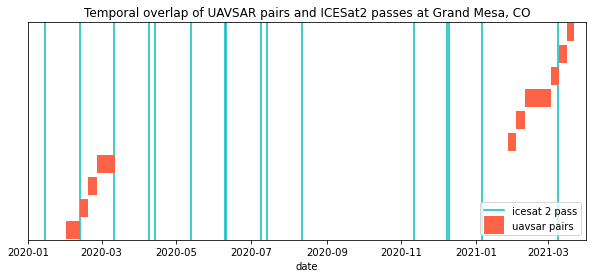

In [10]:
# plot temporal overlap
f, ax = plt.subplots(figsize=(10,4))

# plot icesat passes as vertical lines
for i in range(len(icesat_df)):
    ax.axvline(icesat_df['time'][i], 0, 1, c='c', label='icesat 2 pass') 

# plot uavsar pairs as horizontal bars 
for i in range(len(uavsar_df)):
    ax.plot([uavsar_df['start_date'][i], uavsar_df['end_date'][i]], [i, i], 'tomato', lw=18, solid_capstyle='butt', label='uavsar pairs')
ax.set_yticks([])
ax.set_xlabel('date')
ax.set_xlim(datetime.strptime('20200101', '%Y%m%d'), datetime.strptime('20210401', '%Y%m%d'))
            
# remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_title('Temporal overlap of UAVSAR pairs and ICESat2 passes at Grand Mesa, CO')